# Identify cutoff for TRS detection in reads

In [1]:
import antenna_count_reads
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_cutoff_total_counts(cutoff):
    """Helper function to get summarized number of reads that contain TRS in different configurations"""
    bamfile = f"testing/outbam_{cutoff}.bam"
    bedfile = "/home/nbarkas/antenna/data/orf_start.bed"
    trs_intervals = antenna_count_reads.count_sgRNA(bamfile, bedfile)
    intervals_counts = antenna_count_reads.summarize_trs_intervals(trs_intervals)
    return intervals_counts.iloc[:,4:].sum()

The following expects that files at different cutoffs of detection have been generated in the testing/ directory using the following command:
```
../antenna_tag_reads.py --bam aligned.bam --outbam outbam_$1.bam --progress --check-all-orientations --score-cutoff $1
```
where $1 is in the ranger of 10,30 with increment of 2.

In [3]:
# Load the results into a single DataFrame
counts_series_list = []
for i in range(10,30,2):
    counts_series_list.append(get_cutoff_total_counts(i))
aggregated = pd.concat(counts_series_list, axis=1, keys=range(10,30,2))

100%|██████████| 726622/726622 [00:03<00:00, 182364.52it/s]


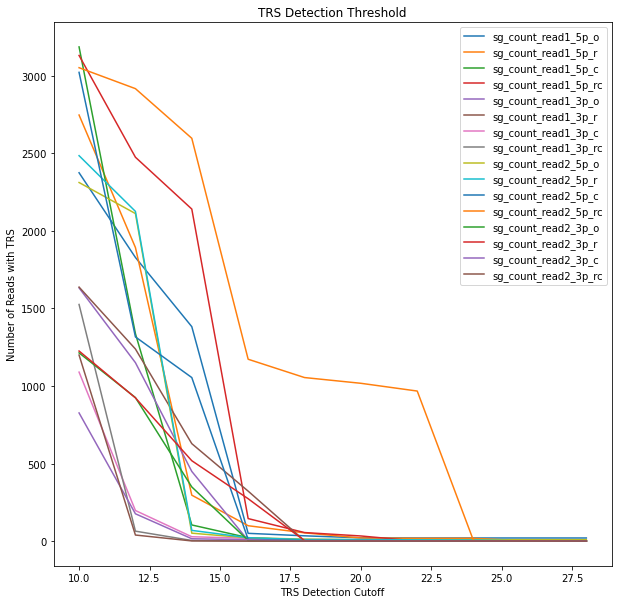

In [14]:
# Generate plot
plt.rcParams['figure.figsize'] = [10, 10]
aggregated.iloc[1:17].T.plot(kind='line')
plt.xlabel('TRS Detection Cutoff')
plt.ylabel('Number of Reads with TRS')
plt.title('TRS Detection Threshold')
plt.show()